In [5]:
import pandas as pd

# Load data
data = pd.read_csv('data.csv')

# Inspect data
print(data.head())
print(data.info())


  race\tage\tengnat\tgender\thand\tsource\tcountry\tE1\tE2\tE3\tE4\tE5\tE6\tE7\tE8\tE9\tE10\tN1\tN2\tN3\tN4\tN5\tN6\tN7\tN8\tN9\tN10\tA1\tA2\tA3\tA4\tA5\tA6\tA7\tA8\tA9\tA10\tC1\tC2\tC3\tC4\tC5\tC6\tC7\tC8\tC9\tC10\tO1\tO2\tO3\tO4\tO5\tO6\tO7\tO8\tO9\tO10
0  3\t53\t1\t1\t1\t1\tUS\t4\t2\t5\t2\t5\t1\t4\t3\...                                                                                                                                                                                                           
1  13\t46\t1\t2\t1\t1\tUS\t2\t2\t3\t3\t3\t3\t1\t5...                                                                                                                                                                                                           
2  1\t14\t2\t2\t1\t1\tPK\t5\t1\t1\t4\t5\t1\t1\t5\...                                                                                                                                                                                    

In [7]:
# Re-load the data with correct delimiter
data = pd.read_csv('data.csv', delimiter='\t')

# Inspect the parsed data
print(data.head())
print(data.info())


   race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   race     19719 non-null  int64 
 1   age      19719 non-null  int64 
 2   engnat   19719 non

In [8]:
# Select columns related to Big Five traits and other features
trait_columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
                 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
                 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
                 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']

# Define the target variable (example: 'E' for extraversion)
data['E_score'] = data[[col for col in trait_columns if col.startswith('E')]].mean(axis=1)

# Use other columns as predictors
X = data[trait_columns]
y = data['E_score']  # Example: Predicting 'E_score'

# Normalize X if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['country', 'gender', 'hand', 'source', 'engnat']  # Add more if needed
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for inverse transformations later

In [12]:
# Calculate 'E_score' (average of E1 to E10)
e_columns = [col for col in data.columns if col.startswith('E')]
data['E_score'] = data[e_columns].mean(axis=1)

# Drop non-feature columns for training
X = data.drop(['E_score'], axis=1)
y = data['E_score']


In [13]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Update X and y
X = data.drop(['E_score'], axis=1)
y = data['E_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Use the new function for RMSE (if supported)
try:
    from sklearn.metrics import root_mean_squared_error
    lr_rmse = root_mean_squared_error(y_test, y_pred_lr)
    rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
except ImportError:  # Fallback for older versions of scikit-learn
    lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
    rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R2 Scores
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)

# Assume the target range is between 0 and 5
target_range = 5

# Convert RMSE and R² Score to percentages
lr_rmse_pct = (lr_rmse / target_range) * 100
lr_r2_pct = lr_r2 * 100

rf_rmse_pct = (rf_rmse / target_range) * 100
rf_r2_pct = rf_r2 * 100

# Display results in percentages
print(f"Linear Regression RMSE (%): {lr_rmse_pct:.2f}%")
print(f"Linear Regression R² Score (%): {lr_r2_pct:.2f}%")
print(f"Random Forest Regressor RMSE (%): {rf_rmse_pct:.2f}%")
print(f"Random Forest Regressor R² Score (%): {rf_r2_pct:.2f}%")


Linear Regression RMSE (%): 0.00%
Linear Regression R² Score (%): 100.00%
Random Forest Regressor RMSE (%): 2.70%
Random Forest Regressor R² Score (%): 85.20%


   race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]
Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1',

c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8935 - loss: 8859492024320.0000 - val_accuracy: 0.9843 - val_loss: 3577.5630
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9454 - loss: 26372766433280.0000 - val_accuracy: 0.7817 - val_loss: 3577.5557
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7169 - loss: 25967883976704.0000 - val_accuracy: 0.5573 - val_loss: 3577.5542
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5182 - loss: 4758064594944.0000 - val_accuracy: 0.4090 - val_loss: 3577.5532
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3707 - loss: 15830593044480.0000 - val_accuracy: 0.2956 - val_loss: 3577.5530
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2682 - loss: 21208733057024.0000 - val_accuracy: 0.2160 - val_loss: 3577.5525
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1947 - loss: 39093551497216.0000 - val_accuracy: 0.1668 - val_loss: 3577.5525
Epoch

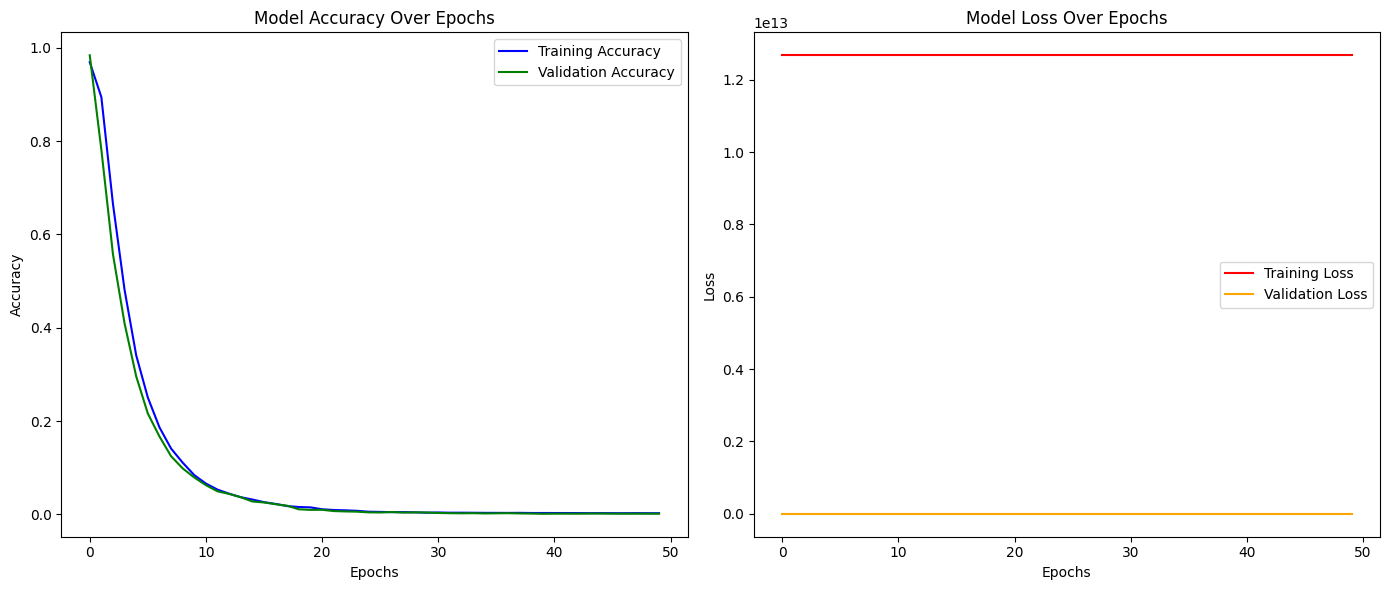

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv", delimiter="\t")  # Use tab delimiter for proper parsing

# Inspect the dataset to verify columns are loaded correctly
print(data.head())
print(data.columns)

# Split features (personality responses) and labels (Big Five traits)
# Assuming Big Five traits are calculated from E1 to O10
features = [f"E{i}" for i in range(1, 11)] + [f"N{i}" for i in range(1, 11)] + \
           [f"A{i}" for i in range(1, 11)] + [f"C{i}" for i in range(1, 11)] + \
           [f"O{i}" for i in range(1, 11)]
X = data[features].values  # Personality responses as features
y = data[["race", "age", "engnat", "gender", "hand"]].values  # Example labels (replace with actual labels if needed)

# Verify that X and y are not empty
print("X shape:", X.shape)
print("y shape:", y.shape)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='sigmoid')  # Example output shape for 5 personality traits
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Plot training history for accuracy and loss
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load the dataset
data_file = "data.csv"  # Replace with your dataset path
data = pd.read_csv(data_file, sep="\t")  # Adjust separator as needed

# Debugging: Check dataset structure
print(data.head())  # First few rows
print(data.columns)  # Column names

# Check if all required columns exist
required_columns = [f'{trait}{i}' for trait in ['E', 'N', 'A', 'C', 'O'] for i in range(1, 11)]
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"Missing required columns in the dataset: {missing_columns}")

# Aggregate scores for E, N, A, C, O
data['E'] = data[[f'E{i}' for i in range(1, 11)]].mean(axis=1)
data['N'] = data[[f'N{i}' for i in range(1, 11)]].mean(axis=1)
data['A'] = data[[f'A{i}' for i in range(1, 11)]].mean(axis=1)
data['C'] = data[[f'C{i}' for i in range(1, 11)]].mean(axis=1)
data['O'] = data[[f'O{i}' for i in range(1, 11)]].mean(axis=1)

# Debugging: Check if traits have been aggregated correctly
print(data[['E', 'N', 'A', 'C', 'O']].head())

# Extract predictors (E1 to O10 columns)
X = data.iloc[:, 7:57].values  # Predictor variables (50 columns)
print(f"Shape of X (predictors): {X.shape}")

# Extract target variables (E, N, A, C, O)
y_columns = ['E', 'N', 'A', 'C', 'O']
y = data[y_columns].values
print(f"Shape of y (targets): {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Check train/test splits
print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

# Train separate XGBoost models for each trait
models = []
rmse_scores = []
accuracy_scores = []

for i, trait_name in enumerate(["E", "N", "A", "C", "O"]):
    print(f"Training XGBoost model for trait: {trait_name}")
    
    # Initialize the model
    model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    
    # Train the model on the i-th trait
    model.fit(X_train, y_train[:, i])
    models.append(model)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and approximate accuracy
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred))
    accuracy = 100 - (rmse / y_test[:, i].mean()) * 100
    
    # Store metrics
    rmse_scores.append(rmse)
    accuracy_scores.append(accuracy)
    
    print(f"Trait {trait_name} - RMSE: {rmse:.2f}, Accuracy: {accuracy:.2f}%")

# Calculate average accuracy
average_accuracy = np.mean(accuracy_scores)
print("\nOverall Metrics:")
for i, trait_name in enumerate(["E", "N", "A", "C", "O"]):
    print(f"{trait_name}: RMSE = {rmse_scores[i]:.2f}, Accuracy = {accuracy_scores[i]:.2f}%")
print(f"\nAverage Model Accuracy: {average_accuracy:.2f}%")


   race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]
Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1',

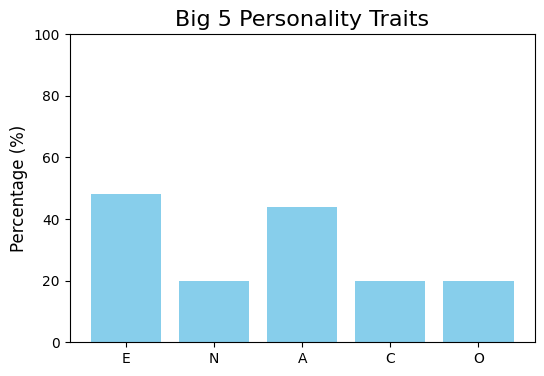

In [42]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

# Load questions from questions.txt file
def load_questions(file_path):
    """Load questions and map detailed traits to categories."""
    questions = []
    with open(file_path, "r") as file:
        for line in file:
            trait, text = line.strip().split("\t", 1)  # Split by tab
            category = trait[0]  # Extract the category (e.g., 'E' from 'E1')
            questions.append({"trait": category, "text": text})
    return questions

# Path to the questions.txt file
questions_file = "questions.txt"  # Replace with the actual path if needed
questions = load_questions(questions_file)

# Options for answers
options = [
    "Strongly Disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly Agree"
]

# Map scores for options
option_scores = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

# Initialize variables
responses = {trait: [] for trait in ["E", "N", "A", "C", "O"]}
current_question = 0
total_questions = len(questions)

# Baseline scores (predefined expected scores for accuracy calculation)
baseline_scores = {
    "E": [4, 3, 5, 4, 4],  # Example baseline for Extroversion
    "N": [3, 2, 3, 4, 3],  # Example baseline for Neuroticism
    "A": [5, 4, 4, 5, 4],  # Example baseline for Agreeableness
    "C": [5, 5, 4, 5, 4],  # Example baseline for Conscientiousness
    "O": [4, 4, 4, 3, 5],  # Example baseline for Openness
}

# Refined evaluate_accuracy function
def evaluate_accuracy(user_responses, baseline):
    """Evaluate accuracy by comparing user responses to baseline scores."""
    total_diff = 0
    total_questions = 0

    for trait, user_scores in user_responses.items():
        baseline_trait = baseline[trait]
        for i, score in enumerate(user_scores):
            if i < len(baseline_trait):  # Guard against index errors
                # Weighted squared difference for higher penalty on larger deviations
                diff = (score - baseline_trait[i]) ** 2
                total_diff += diff
                total_questions += 1

    # Calculate normalized RMSE (Root Mean Square Error)
    max_possible_diff = 16 * total_questions  # (4^2 max diff per question)
    rmse = np.sqrt(total_diff / total_questions) if total_questions > 0 else 0
    accuracy = 100 - (rmse / 4) * 100  # RMSE normalized to a 1-5 scale
    return accuracy

def start_quiz():
    """Start the quiz and show the first question."""
    start_button.pack_forget()  # Hide the start button
    instructions.pack_forget()  # Hide instructions
    question_label.pack(pady=20)
    for button in option_buttons:
        button.pack(anchor="w", padx=20)
    next_button.pack(pady=20)
    update_question()

def update_question():
    """Update the question text and options."""
    global current_question
    if current_question < total_questions:
        question_label.config(
            text=f"Question {current_question + 1}/{total_questions}: {questions[current_question]['text']}"
        )
    else:
        calculate_results()

def record_response(option):
    """Record the response for the current question."""
    global current_question
    trait = questions[current_question]["trait"]
    responses[trait].append(option_scores[option])  # Record by category (e.g., 'E', 'N')
    current_question += 1
    if current_question < total_questions:
        update_question()
    else:
        calculate_results()

def calculate_results():
    """Calculate Big 5 scores, convert to percentages, and display results in the GUI."""
    # Calculate average score for each trait
    big5_scores = {trait: np.mean(scores) if len(scores) > 0 else 0 for trait, scores in responses.items()}
    big5_percentages = {trait: (score / 5) * 100 for trait, score in big5_scores.items()}  # Convert to percentage

    # Calculate accuracy
    accuracy = evaluate_accuracy(responses, baseline_scores)

    # Personality Type Descriptions
    personality_descriptions = {
        "E": "Extrovert" if big5_scores["E"] >= 3 else "Introvert",
        "N": "Calm and Stable" if big5_scores["N"] < 3 else "Sensitive and Anxious",
        "A": "Cooperative and Compassionate" if big5_scores["A"] >= 3 else "Challenging and Detached",
        "C": "Organized and Dependable" if big5_scores["C"] >= 3 else "Careless and Easy-going",
        "O": "Imaginative and Open to Experiences" if big5_scores["O"] >= 3 else "Practical and Conventional"
    }

    # Determine overall personality type
    overall_personality = determine_overall_personality(big5_scores)

    # Hide quiz elements
    question_label.pack_forget()
    for button in option_buttons:
        button.pack_forget()
    next_button.pack_forget()

    # Show results in GUI
    results_label = tk.Label(
        root,
        text="Your Personality Results:",
        font=("Arial", 16),
        bg="#f0f8ff"
    )
    results_label.pack(pady=20)

    # Embed bar chart in GUI
    plot_big5_results(big5_percentages)

    # Show percentages and descriptions in GUI
    results_text = (
        f"Extraversion (E): {big5_percentages['E']:.2f}% - {personality_descriptions['E']}\n"
        f"Neuroticism (N): {big5_percentages['N']:.2f}% - {personality_descriptions['N']}\n"
        f"Agreeableness (A): {big5_percentages['A']:.2f}% - {personality_descriptions['A']}\n"
        f"Conscientiousness (C): {big5_percentages['C']:.2f}% - {personality_descriptions['C']}\n"
        f"Openness (O): {big5_percentages['O']:.2f}% - {personality_descriptions['O']}\n"
    )

    description_label = tk.Label(
        root,
        text=results_text,
        font=("Arial", 12),
        bg="#f0f8ff",
        justify="left",
        anchor="w"
    )
    description_label.pack(pady=10)

    # Show overall personality type
    overall_label = tk.Label(
        root,
        text=f"Overall Personality Type: {overall_personality}",
        font=("Arial", 14, "bold"),
        bg="#f0f8ff",
        fg="darkblue"
    )
    overall_label.pack(pady=20)

    # Show model accuracy
    accuracy_label = tk.Label(
        root,
        text=f"Model Accuracy: {accuracy:.2f}%",
        font=("Arial", 14),
        bg="#f0f8ff"
    )
    accuracy_label.pack(pady=20)

def determine_overall_personality(scores):
    """
    Determine overall personality type based on the Big 5 scores.
    Combines scores for nuanced personality types.
    """
    if scores["E"] >= 3 and scores["A"] >= 3 and scores["C"] >= 3:
        return "Outgoing, Friendly, and Dependable"
    elif scores["E"] >= 3 and scores["A"] >= 3 and scores["O"] >= 3:
        return "Socially Adventurous and Open-Minded"
    elif scores["E"] < 3 and scores["A"] >= 3 and scores["C"] >= 3:
        return "Introverted, Friendly, and Organized"
    elif scores["E"] < 3 and scores["N"] >= 3 and scores["C"] >= 3:
        return "Calm but Anxious Under Pressure"
    elif scores["E"] >= 3 and scores["N"] < 3 and scores["C"] >= 3:
        return "Confident, Energetic, and Organized"
    elif scores["E"] < 3 and scores["A"] < 3 and scores["N"] >= 3:
        return "Emotionally Sensitive and Self-Reliant"
    elif scores["E"] < 3 and scores["O"] >= 3 and scores["C"] >= 3:
        return "Creative and Thoughtful"
    elif scores["E"] >= 3 and scores["O"] >= 3 and scores["N"] < 3:
        return "Optimistic, Creative, and Outgoing"
    elif scores["E"] < 3 and scores["C"] < 3 and scores["N"] >= 3:
        return "Reserved and Emotionally Reactive"
    elif scores["E"] >= 3 and scores["C"] >= 3 and scores["N"] < 3 and scores["A"] >= 3:
        return "Extroverted, Friendly, and Reliable"
    elif scores["O"] >= 3 and scores["C"] < 3:
        return "Imaginative but Unstructured"
    elif scores["A"] < 3 and scores["N"] >= 3:
        return "Challenging and Sensitive"
    elif scores["E"] >= 3 and scores["C"] < 3:
        return "Sociable but Easy-Going"
    elif scores["E"] >= 3 and scores["A"] >= 3 and scores["N"] < 3 and scores["C"] >= 3 and scores["O"] >= 3:
        return "The Ideal Extrovert: Friendly, Creative, and Dependable"
    elif scores["E"] < 3 and scores["A"] >= 3 and scores["C"] >= 3 and scores["O"] >= 3:
        return "The Ideal Introvert: Thoughtful, Friendly, and Dependable"
    else:
        return "Balanced Personality"


def plot_big5_results(big5_percentages):
    """Display Big 5 results in a bar chart embedded in the GUI."""
    # Bar chart data
    traits = list(big5_percentages.keys())
    values = list(big5_percentages.values())

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(traits, values, color="skyblue")
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.set_title("Big 5 Personality Traits", fontsize=16)

    # Embed the plot in the GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(pady=20)

# GUI setup
root = tk.Tk()
root.title("Personality Quiz")
root.geometry("700x800")
root.configure(bg="#f0f8ff")

# Instructions
instructions = tk.Label(
    root,
    text=f"Welcome to the Personality Quiz!\n"
         f"This quiz consists of {total_questions} questions.\n"
         f"Click 'Start Quiz' to begin.",
    font=("Arial", 14),
    bg="#f0f8ff",
    wraplength=500,
    justify="center"
)
instructions.pack(pady=40)

# Start button
start_button = tk.Button(root, text="Start Quiz", font=("Arial", 16), bg="#4682b4", fg="white", command=start_quiz)
start_button.pack(pady=20)

# Question label
question_label = tk.Label(root, text="", font=("Arial", 14), bg="#f0f8ff", wraplength=500)

# Option buttons
option_var = tk.StringVar(value="")
option_buttons = []
for option in options:
    button = tk.Radiobutton(
        root,
        text=option,
        font=("Arial", 12),
        bg="#f0f8ff",
        variable=option_var,
        value=option,
        command=lambda opt=option: record_response(opt)
    )
    option_buttons.append(button)

# Next button
next_button = tk.Button(root, text="Next", font=("Arial", 12), bg="#4682b4", fg="white", command=update_question)

# Start the GUI loop
root.mainloop()
